# Gradient Boosting on Mushrooms Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import numpy as np

**Read the data set**

In [2]:
mushroomsDataSet = pd.read_csv("mushrooms.csv")
mushroomsDataSet.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [3]:
mushroomsDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

**Data preprocessing**

In [4]:
# check for missing values in all the columns
mushroomsDataSet.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

**Identify the unique elements of the categorical data variable "class"**

In [5]:
print(mushroomsDataSet['class'].unique())

['p' 'e']


**Count the number of unique elements of the categorical data variable "class"**

In [6]:
mushroomsDataSet['class'].value_counts()      # where, e===> edible and p ===> poisonous

e    4208
p    3916
Name: class, dtype: int64

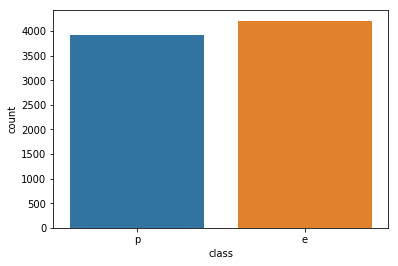

In [7]:
# graphical plot of the number of elements in poisonous and edible class.
sb.countplot(mushroomsDataSet['class'], label = "Count")

**Label Encoding**

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mushrooms=mushroomsDataSet.apply(le.fit_transform)

**Exploratory Data Analysis (EDA)**

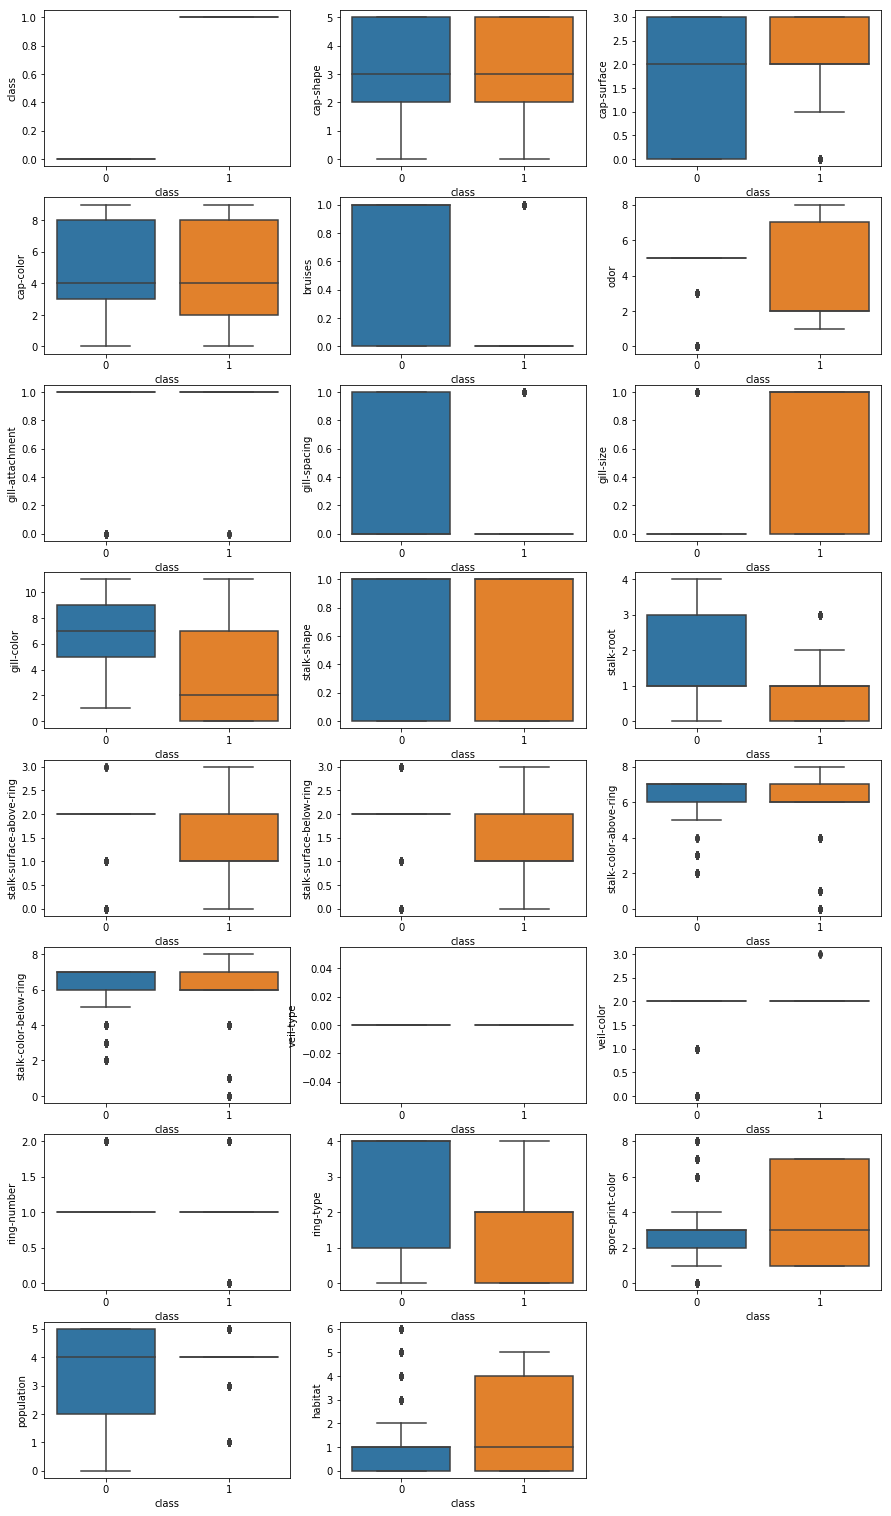

In [9]:
plt.figure(figsize=(15,27))
j= 1
for columns in mushrooms.columns:
    plt.subplot(8,3,j)
    sb.boxplot(mushrooms['class'],mushrooms[columns])
    plt.xlabel("class")
    plt.ylabel("%s"%columns)
    j = j +1
plt.show()

**Correlation matrix**

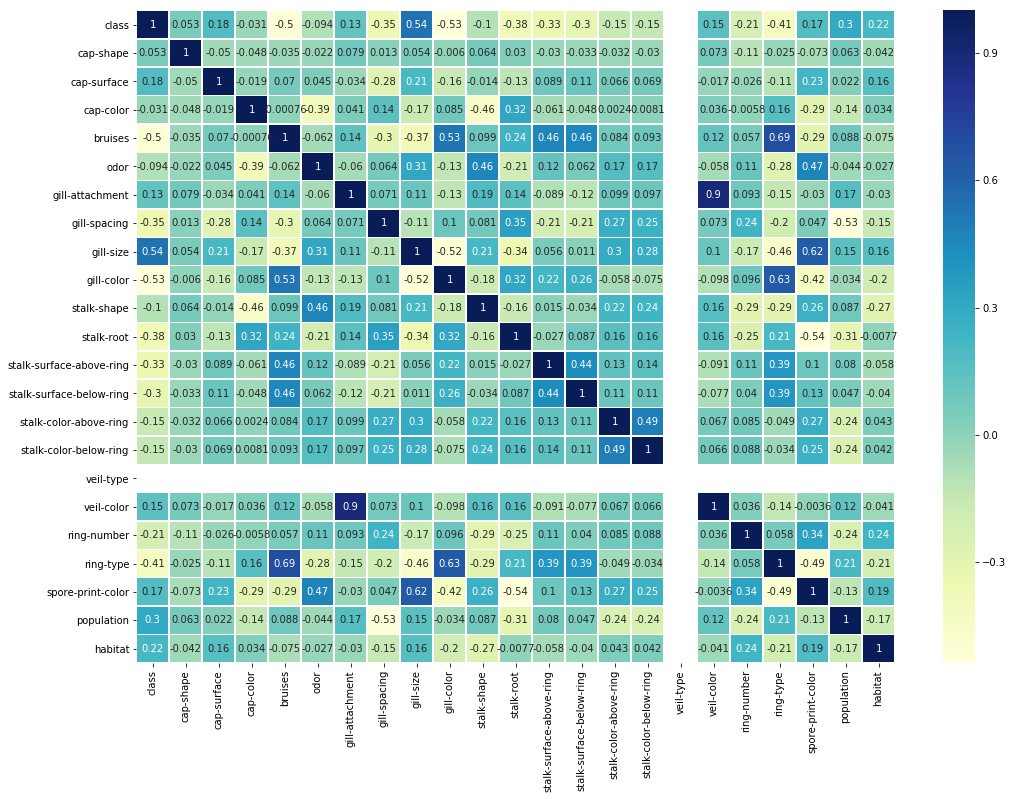

In [10]:
# check for highest feature correlation with the target variable
mushroomsCorrelationMatrix=mushrooms.corr()
plt.figure(figsize=(17,12)) 
sb.heatmap(mushroomsCorrelationMatrix, annot=True,linewidths=.5,cmap="YlGnBu")

**Prepare the data for sampling**

In [11]:
X = mushrooms.drop("class",axis = 1)
Y = mushrooms["class"]

**Split the data into training and testing sets**

In [12]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=40)

/home/varshita/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


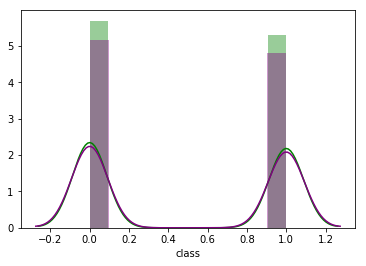

In [13]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

**Create a dictionary of parameters to be tuned **

In [14]:
tp = {"n_estimators":range(2,50)}

**Create the model using sklearn GradientBoostingClassifier**

In [15]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier(random_state= 30)

/home/varshita/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Find the best value of tuning parameter to reduce the model error using cross validation**

In [16]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbc,tp,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
gbcBestParams=cvmodel.best_params_
print("The best parameters for Gradient Boosting Classifier are %s  "%gbcBestParams)

The best parameters for Gradient Boosting Classifier are {'n_estimators': 42}  


In [17]:
gbc = GradientBoostingClassifier(n_estimators = 42,learning_rate =2,random_state = 30)
modelGradientBoostingClassifier=gbc.fit(xtrain,ytrain)

**Build Predictions**

In [18]:
predGradientBoostingClassifier=modelGradientBoostingClassifier.predict(xtest)

In [19]:
ytest.value_counts()

0    842
1    783
Name: class, dtype: int64

**Confusion matrix and Accuracy score for Gradient Boosting Classification**

The accuracy score for Gradient Boosting Classification is 1.00


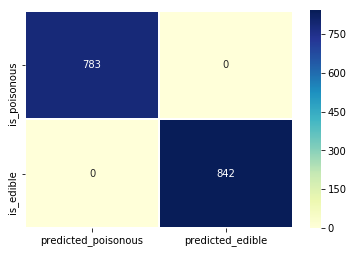

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("The accuracy score for Gradient Boosting Classification is %.2f"%accuracy_score(ytest,predGradientBoostingClassifier))

cmGradientBoostingClassifier=np.array(confusion_matrix(ytest,predGradientBoostingClassifier,labels = [1,0]))

cmGradientBoostingClassifier = pd.DataFrame(cmGradientBoostingClassifier,index= ["is_poisonous","is_edible"],columns= ["predicted_poisonous","predicted_edible"])
sb.heatmap(cmGradientBoostingClassifier, annot=True, fmt="d",linewidths=1.5,cmap="YlGnBu")